In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Display the data table for preview



In [3]:
# Read the Mouse and Drug Data and the Clinical Trial data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [4]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [5]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
combined_df.groupby("Drug")["Timepoint"].count()
tumor_response = combined_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
tumor_df = tumor_response["Tumor Volume (mm3)"].mean().to_frame()
# Preview DataFrame
#tumor_df
tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_error = combined_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tre_df = tumor_response_error.to_frame()
# Preview DataFrame
tre_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume = tumor_df.unstack(0)
tumor_volume
# Preview that Reformatting worked
tumor_volume_df = tumor_volume["Tumor Volume (mm3)"]
tumor_volume_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


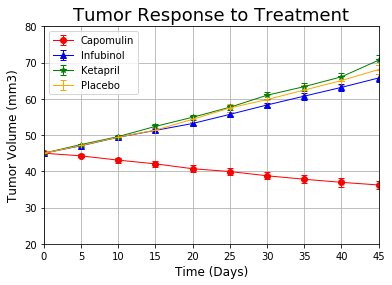

In [8]:
# Generate the Plot (with Error Bars)
x_axis = [0,5,10,15,20,25,30,35,40,45]
x_limit = 45

error = tre_df["Tumor Volume (mm3)"]["Capomulin"]
cap = plt.errorbar(x_axis, tumor_volume_df["Capomulin"], yerr=error, fmt="o",ls="-", linewidth=1, alpha=1, capsize=3,color ="red")

error = tre_df["Tumor Volume (mm3)"]["Infubinol"]
infu = plt.errorbar(x_axis, tumor_volume_df["Infubinol"], yerr=error, fmt="^", ls="-", linewidth=1, alpha=1, capsize=3,color ="blue")

error = tre_df["Tumor Volume (mm3)"]["Ketapril"]
keta = plt.errorbar(x_axis, tumor_volume_df["Ketapril"], yerr=error, fmt="*", ls="-", linewidth=1, alpha=1, capsize=3,color = "green")

error = tre_df["Tumor Volume (mm3)"]["Placebo"]
plac = plt.errorbar(x_axis, tumor_volume_df["Placebo"], yerr=error, fmt="+", ls="-", linewidth=1, alpha=1, capsize=3,color = "orange")

plt.ylim(20, 80)
plt.xlim(0, 45)

#plt.plots
plt.title("Tumor Response to Treatment", fontsize=18)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)

# Save the Figure
plt.grid(linestyle="-")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=10)
plt.show()


## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combined_df.groupby("Drug")["Timepoint"].count()
metastatic_response = combined_df.groupby(["Drug", "Timepoint"])

# Convert to DataFrame
msr_df = metastatic_response["Metastatic Sites"].mean().to_frame()
# Preview DataFrame
msr_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sites_error = combined_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
meta_sites_error_df = meta_sites_error.to_frame()
# Preview DataFrame
meta_sites_error_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
metastatic_sites = msr_df.unstack(0)
metastatic_sites

# Preview that Reformatting worked
metastatic_sites_df = metastatic_sites["Metastatic Sites"]
metastatic_sites_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


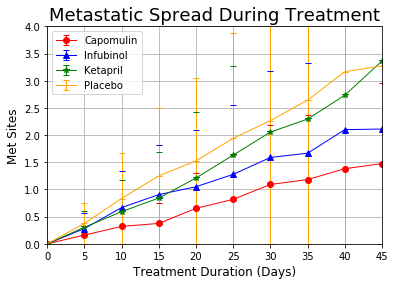

In [12]:
# Generate the Plot (with Error Bars)
error = msr_df["Metastatic Sites"]["Capomulin"]
cap = plt.errorbar(x_axis, metastatic_sites_df["Capomulin"], yerr=error, fmt="o",ls="-", linewidth=1, alpha=1, capsize=3,color ="red")

error = msr_df["Metastatic Sites"]["Infubinol"]
infu = plt.errorbar(x_axis, metastatic_sites_df["Infubinol"], yerr=error, fmt="^", ls="-", linewidth=1, alpha=1, capsize=3,color ="blue")

error = msr_df["Metastatic Sites"]["Ketapril"]
keta = plt.errorbar(x_axis, metastatic_sites_df["Ketapril"], yerr=error, fmt="*", ls="-", linewidth=1, alpha=1, capsize=3,color = "green")

error = msr_df["Metastatic Sites"]["Placebo"]
plac = plt.errorbar(x_axis, metastatic_sites_df["Placebo"], yerr=error, fmt="+", ls="-", linewidth=1, alpha=1, capsize=3,color = "orange")

plt.ylim(0, 4)
plt.xlim(0, 45)

plt.title("Metastatic Spread During Treatment", fontsize=18)
plt.xlabel("Treatment Duration (Days)", fontsize=12)
plt.ylabel("Met Sites", fontsize=12)

plt.grid(linestyle="-")
plt.legend((cap, infu, keta, plac), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=10)
plt.show()


# Show the Figure


## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
# Convert to DataFrame
mouse_count = count_mice.to_frame()
# Preview DataFrame
mouse_count = mouse_count.rename(columns={"Mouse ID": "Mouse Count"})
mouse_count.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [14]:
# Minor Data Munging to Re-Format the Data Frames
mouse_plot = mouse_count.unstack(0)
mouse_df = mouse_plot["Mouse Count"]

# Preview the Data Frame
mouse_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


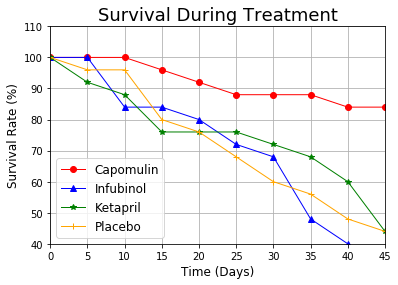

In [15]:
# Generate the Plot (Accounting for percentages)

cap3 = plt.errorbar(x_axis, (mouse_df["Capomulin"]/25*100), fmt="o", ls="-", linewidth=1, alpha=1, capsize=3,color = "red")
infu3 = plt.errorbar(x_axis, (mouse_df["Infubinol"]/25*100), fmt="^", ls="-", linewidth=1, alpha=1, capsize=3,color = "blue")
keta3 = plt.errorbar(x_axis, (mouse_df["Ketapril"]/25*100),  fmt="*", ls="-", linewidth=1, alpha=1, capsize=3,color ="green")
plac3 = plt.errorbar(x_axis, (mouse_df["Placebo"]/25*100),  fmt="+", ls="-", linewidth=1, alpha=1, capsize=3,color ="orange")

plt.ylim(40, 110)
plt.xlim(0, 45)

plt.title("Survival During Treatment", fontsize=18)
plt.xlabel("Time (Days)", fontsize=12)
plt.ylabel("Survival Rate (%)", fontsize=12)

plt.grid(linestyle="-")
plt.legend((cap3, infu3, keta3, plac3), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12)

# Show the Figure
plt.show()



## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug

capomulinchange = ((tumor_volume_df["Capomulin"][45] - tumor_volume_df["Capomulin"][0])/45)*100
ceftaminchange = ((tumor_volume_df["Ceftamin"][45] - tumor_volume_df["Ceftamin"][0])/45)*100
infubinolchange = ((tumor_volume_df["Infubinol"][45] - tumor_volume_df["Infubinol"][0])/45)*100
ketaprilchange = ((tumor_volume_df["Ketapril"][45] - tumor_volume_df["Ketapril"][0])/45)*100
naftisolchange = ((tumor_volume_df["Naftisol"][45] - tumor_volume_df["Naftisol"][0])/45)*100
placebochange = ((tumor_volume_df["Placebo"][45] - tumor_volume_df["Placebo"][0])/45)*100
proprivachange = ((tumor_volume_df["Propriva"][45] - tumor_volume_df["Propriva"][0])/45)*100
ramicanechange = ((tumor_volume_df["Ramicane"][45] - tumor_volume_df["Ramicane"][0])/45)*100
stelasynchange = ((tumor_volume_df["Stelasyn"][45] - tumor_volume_df["Stelasyn"][0])/45)*100
zoniferolchange = ((tumor_volume_df["Zoniferol"][45] - tumor_volume_df["Zoniferol"][0])/45)*100
# Display the data to confirm
drug_change_df = pd.DataFrame({"Drug": ["Capomulin", "Infubinol", "Ketapril", "Placebo", "Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"],
                               "Percent Change": [capomulinchange, infubinolchange, ketaprilchange, placebochange,ceftaminchange,naftisolchange,proprivachange,ramicanechange,stelasynchange,zoniferolchange]
                              })

drug_change_df                               

,Drug,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960
4,Ceftamin,42.516492
5,Naftisol,53.923347
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


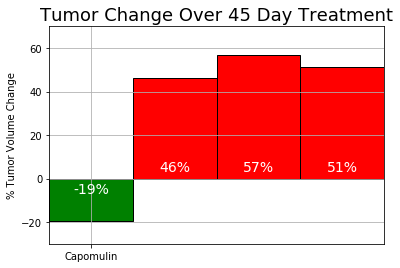

In [21]:
# Store all Relevant Percent Changes into a Tuple

# Splice the data between passing and failing drugs

# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes
# Call functions to implement the function calls
rects1 = plt.bar(0, drug_change_df["Percent Change"][0], color='g', alpha=1, align="edge", ec="black", width=1)
rects2 = plt.bar(1, drug_change_df["Percent Change"][1], color='r', alpha=1, align="edge", ec="black", width=1)
rects3 = plt.bar(2, drug_change_df["Percent Change"][2], color='r', alpha=1, align="edge", ec="black", width=1)
rects4 = plt.bar(3, drug_change_df["Percent Change"][3], color='r', alpha=1, align="edge", ec="black", width=1)

tick_locations = [value+0.5 for value in x_axis]
plt.grid(linestyle="-")
plt.xticks(tick_locations, drug_change_df["Drug"])
#plt.xticks(tick_locations, drug_change_df["Capomulin", "infubinol", "Ketapril", "Placebo"])

plt.xlim(0, 4)
plt.ylim(-30, 70)

plt.title("Tumor Change Over 45 Day Treatment", fontsize=18)
plt.ylabel("% Tumor Volume Change")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., -8,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects1)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 2,
                '%d' % int(height) + "%", 
                ha='center', va='bottom', color='white', fontsize=14)

autolabel(rects2)
autolabel(rects3)
autolabel(rects4)        

plt.show()


# Show the Figure


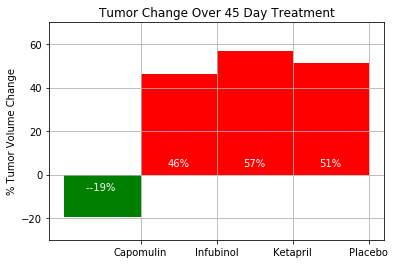